## Análisis exploratorio de datos
No existe un proceso estandar para hacer este análisis, toda la información que encontremos nos va a ir guiando a traves del análisis.<br>
Sin embargo existe un proceso en particular que suele ser muy util para hacer este tipo de análisis y es el DataTransformation

In [1]:
%load_ext watermark
%watermark

2020-09-04T17:06:23-05:00

CPython 3.7.6
IPython 7.13.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-45-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
# lectura del dataframe
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
vehiculos = pd.read_csv("vehiculos_original.csv")
vehiculos.head()

,make,model,year,displ,cylinders,trany,drive,VClass,fuelType,comb08,co2TailpipeGpm
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500


In [3]:
vehiculos = vehiculos.rename(columns={
    "make":"fabricante",
    "model":"modelo",
    "displ":"desplazamiento", #volumen de desplazamiento del motor
    "cylinders":"cilindros",
    "trany":"transmision",
    "drive":"traccion",
    "VClass":"clase",
    "fuelType":"combustible",
    "comb08":"consumo",
    "co2TailpipeGpm":"co2"
}
)
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500


In [4]:
vehiculos.dtypes

fabricante         object
modelo             object
year                int64
desplazamiento    float64
cilindros         float64
transmision        object
traccion           object
clase              object
combustible        object
consumo             int64
co2               float64
dtype: object

## Establecer objetivo
Debemos establecer un objetivo del análisis para saber que variables debemos estudiar.<br><br>
Para este caso vamos a estudiar el impacto de co2 por este grupo de coches

### Descrición de entidades
Desribimos las entidades sobre las que podemos hacer análisis <br><br>
fabricante<br>
fabricante+modelo<br>
fabricante+modelo+año<br>

<IPython.core.display.Javascript object>


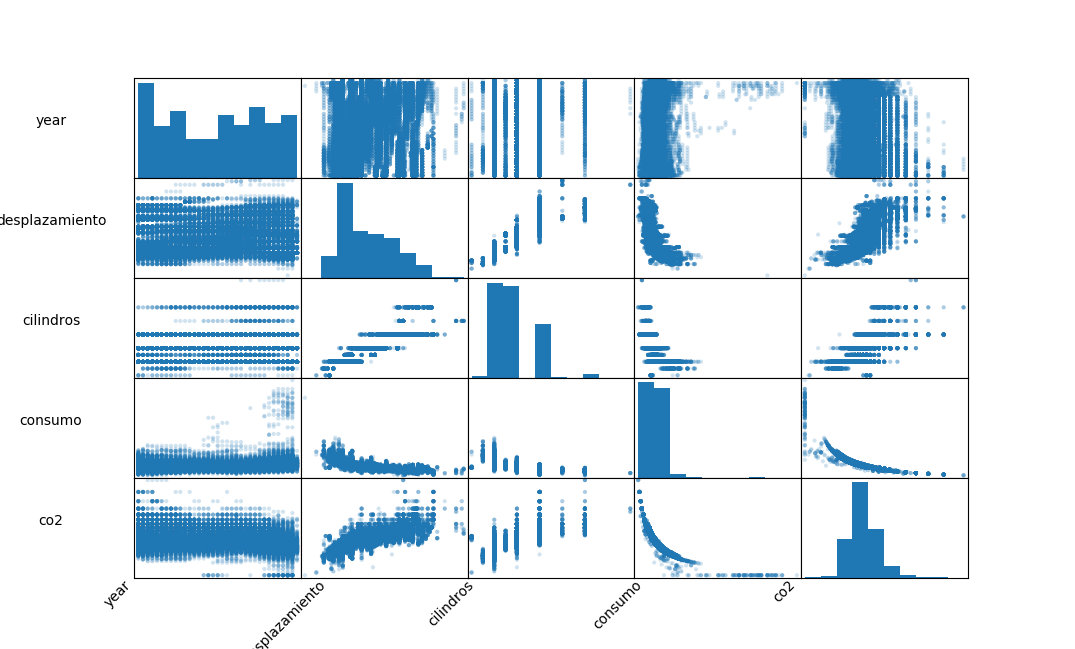

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [5]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(vehiculos,alpha=0.2,diagonal="hist")

#cambiando el nivel de rotacion
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#Cambiando las coordenadas de cada elemento en los ejes
[s.get_yaxis().set_label_coords(-0.5,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(-0.1,0) for s in sm.reshape(-1)]

#Escondiendo los valores de los ejes
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

In [6]:
vehiculos.to_csv("vehiculos.1.procesado_inicial.csv",index=False)

## Diagnostico de calidad de los datos
El diagnostico de calidad de los datos busca encontrar los errores que pueda tener un dataset.<br>
Este proceso es de gran importancia ya que los errores pueden sesgar la información.

In [7]:
vehiculos = pd.read_csv("vehiculos.1.procesado_inicial.csv")
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500
